In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.model_selection import RepeatedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from tqdm import tqdm

In [2]:
path=r'/home/ludovico/ML-project/data/cup/ML-CUP23-'
train_set = pd.read_csv(path+'TR.csv',skiprows=7, header=None, delimiter=',', dtype=str)

input=train_set[train_set.columns[1:-3]]
target=train_set[train_set.columns[-3:]]


In [3]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=0, shuffle=True)

x=np.array(y_train[11].astype(np.float64))
y=np.array(y_train[12].astype(np.float64))
z=np.array(y_train[13].astype(np.float64))

x_train=x_train.astype(np.float64)
y_train=y_train.astype(np.float64)
x_test=x_test.astype(np.float64)
y_test=y_test.astype(np.float64)

def MEE(x, y):
    return np.mean(np.linalg.norm(x - y, 2, axis=1))


In [4]:
estimator_MLP = MLPRegressor()


parameters_MLP= {
'learning_rate': [ "adaptive"],
'hidden_layer_sizes': [  (99,), (105,105,), (110,110,) ],
'alpha': [0.0001,0.001],
'activation': ['tanh','relu'],
'learning_rate_init': [ 0.001,0.005,0.01],
'max_iter': [1000],
'batch_size':[1,5,20],
'solver' : ['sgd'],
'early_stopping': [False],
'n_iter_no_change': [20],
'momentum': [0.1,0.4,0.7],
'nesterovs_momentum': [False,True],
'random_state':[0]
}


parameters_MLP= {
'learning_rate': [ "adaptive"],
'hidden_layer_sizes': [  (105,105,) ],
'alpha': [0.0001],
'activation': ['tanh'],
'learning_rate_init': [ 0.005],
#'power_t': [0.2],
'max_iter': [2000],
'batch_size':[5],
'solver' : ['sgd'],
'early_stopping': [False],
'n_iter_no_change': [20],
'momentum': [0.09],
'nesterovs_momentum': [False],
'tol': [1e-4],
#'validation_fraction': [0.2],
'random_state':[0]
}

'''
parameters_MLP= {
'learning_rate': [ "adaptive"],
'hidden_layer_sizes': [  (100,) ],
'alpha': [0.001],
'activation': ['tanh'],
'learning_rate_init': [ 0.005],
'max_iter': [1000],
'batch_size':[5],
'solver' : ['sgd'],
'early_stopping': [False],
'n_iter_no_change': [20],
'momentum': [0.7],
'nesterovs_momentum': [False],
'tol': [1e-6],
#'validation_fraction': [0.2],
'random_state':[0]
}

'''
parameters_MLP= {
'learning_rate': [ "invscaling"],
'hidden_layer_sizes': [  (100,100,) ],
'alpha': [0.0001],
'activation': ['tanh'],
'learning_rate_init': [ 0.005],
'power_t': [0.05],
'max_iter': [1200],
'batch_size':[10],
'solver' : ['sgd'],
'early_stopping': [False],
'n_iter_no_change': [20],
'momentum': [0.4],
'nesterovs_momentum': [False],
'tol': [1e-6],
#'validation_fraction': [0.2],
'random_state':[0]
}


# with GridSearch
grid_search = GridSearchCV(
    estimator=estimator_MLP,
    param_grid=parameters_MLP,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    refit=True,
    scoring=make_scorer(MEE, greater_is_better=False),
    verbose=3,
)
MLP=grid_search.fit(x_train, y_train)

Fitting 25 folds for each of 1 candidates, totalling 25 fits


[CV 6/25] END activation=tanh, alpha=0.0001, batch_size=10, early_stopping=False, hidden_layer_sizes=(100, 100), learning_rate=invscaling, learning_rate_init=0.005, max_iter=1200, momentum=0.4, n_iter_no_change=20, nesterovs_momentum=False, power_t=0.05, random_state=0, solver=sgd, tol=1e-06;, score=(train=-0.349, test=-0.722) total time=   8.5s
[CV 7/25] END activation=tanh, alpha=0.0001, batch_size=10, early_stopping=False, hidden_layer_sizes=(100, 100), learning_rate=invscaling, learning_rate_init=0.005, max_iter=1200, momentum=0.4, n_iter_no_change=20, nesterovs_momentum=False, power_t=0.05, random_state=0, solver=sgd, tol=1e-06;, score=(train=-0.343, test=-0.624) total time=   9.7s
[CV 2/25] END activation=tanh, alpha=0.0001, batch_size=10, early_stopping=False, hidden_layer_sizes=(100, 100), learning_rate=invscaling, learning_rate_init=0.005, max_iter=1200, momentum=0.4, n_iter_no_change=20, nesterovs_momentum=False, power_t=0.05, random_state=0, solver=sgd, tol=1e-06;, score=(tr

In [5]:
cv_results_df = pd.DataFrame(MLP.cv_results_)
best_model_index=MLP.best_index_

print('best params', MLP.best_params_) 

val_loss=cv_results_df['mean_test_score'][best_model_index]
val_std=cv_results_df['std_test_score'][best_model_index]
train_loss=cv_results_df['mean_train_score'][best_model_index]
train_std=cv_results_df['std_train_score'][best_model_index]
print('Train loss:',train_loss,'+/-', train_std)
print('Validation loss:',val_loss,'+/-', val_std)

cv_results_df

best params {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 10, 'early_stopping': False, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.005, 'max_iter': 1200, 'momentum': 0.4, 'n_iter_no_change': 20, 'nesterovs_momentum': False, 'power_t': 0.05, 'random_state': 0, 'solver': 'sgd', 'tol': 1e-06}
Train loss: -0.3060768394694291 +/- 0.03508598155408758
Validation loss: -0.6119917211393961 +/- 0.05472374857109779


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_batch_size,param_early_stopping,param_hidden_layer_sizes,param_learning_rate,...,split17_train_score,split18_train_score,split19_train_score,split20_train_score,split21_train_score,split22_train_score,split23_train_score,split24_train_score,mean_train_score,std_train_score
0,14.514415,5.135276,0.002567,0.000625,tanh,0.0001,10,False,"(100, 100)",invscaling,...,-0.264092,-0.291423,-0.233423,-0.272242,-0.283385,-0.333593,-0.332964,-0.361654,-0.306077,0.035086


In [208]:

print(grid_search.best_params_) 

print('Best Score - Validation:', grid_search.best_score_ )
y_pred =MLP.predict(x_test)

print('Test-error:', MEE(y_test, y_pred))

cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df#[['mean_test_score','mean_train_score','param_learning_rate','param_hidden_layer_sizes','param_activation']]


{'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 10, 'early_stopping': False, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'invscaling', 'learning_rate_init': 0.005, 'max_iter': 1200, 'momentum': 0.4, 'n_iter_no_change': 20, 'nesterovs_momentum': False, 'power_t': 0.05, 'random_state': 0, 'solver': 'sgd', 'tol': 1e-06}
Best Score - Validation: -0.6119917211393961
Test-error: 0.5460746684144585


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_batch_size,param_early_stopping,param_hidden_layer_sizes,param_learning_rate,...,split17_train_score,split18_train_score,split19_train_score,split20_train_score,split21_train_score,split22_train_score,split23_train_score,split24_train_score,mean_train_score,std_train_score
0,12.902333,4.220228,0.002386,0.000409,tanh,0.0001,10,False,"(100, 100)",invscaling,...,-0.264092,-0.291423,-0.233423,-0.272242,-0.283385,-0.333593,-0.332964,-0.361654,-0.306077,0.035086


100%|██████████| 1200/1200 [00:34<00:00, 34.42it/s]


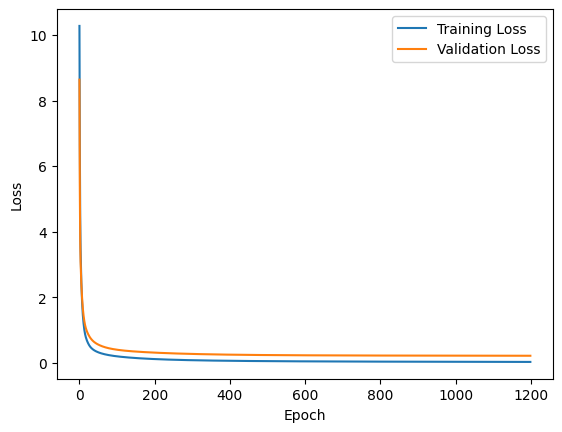

In [6]:
# Split the data into training and validation sets
x_train_cl, x_val, y_train_cl, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0,  shuffle=True)

best_params=grid_search.best_params_
best_params['early_stopping']=False

# Initialize the classifier
clf=clone(MLPRegressor(**best_params))

# Lists to store training and validation loss
train_loss = []
val_loss = []
train_acc = []
val_acc = []

# Training loop
for epoch in tqdm(range(1200)):
    # Partial fit on the training set
    clf.partial_fit(x_train_cl, y_train_cl)

    # Calculate training loss
    y_train_pred = clf.predict(x_train_cl)
    train_loss.append(metrics.mean_squared_error(y_train_cl, (y_train_pred)))

    # Calculate validation loss
    y_val_pred = clf.predict(x_val)
    val_loss.append(metrics.mean_squared_error(y_val, y_val_pred))

# Plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

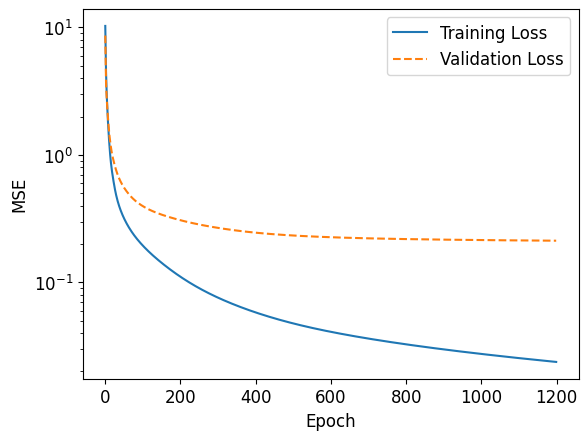

In [8]:
plt.rcParams.update({'font.size': 12})
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss,linestyle='--', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.yscale('log')
plt.legend()
plt.show()

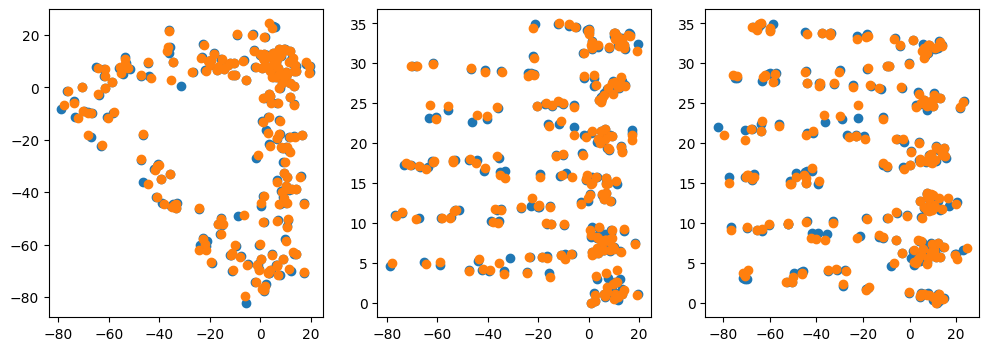

In [68]:
y_pred_plot=y_pred
plt.figure(1,figsize=(12,4))
plt.subplot(131)
plt.scatter(x,y)
plt.scatter(y_pred_plot[:,0],y_pred_plot[:,1])
plt.subplot(132)
plt.scatter(x,z)
plt.scatter(y_pred_plot[:,0],y_pred_plot[:,2])
plt.subplot(133)
plt.scatter(y,z)
plt.scatter(y_pred_plot[:,1],y_pred_plot[:,2])